# Import Required Libraries
Import libraries such as os, matplotlib, and OpenCV (or PIL) for image processing.

In [7]:
# Import Required Libraries
import os
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  # Alternative to OpenCV for image handling

# Load Images and Masks
Load the eye images from '../vessels/val/images' and the corresponding masks from '../vessels/val/masks'.

In [8]:
# Load Images and Masks
image_dir = "../vessels/val/images"
mask_dir = "../vessels/val/masks"

# List all image and mask files
image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
mask_files = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Load images and masks into arrays
images = [cv2.imread(img_file, cv2.IMREAD_COLOR) for img_file in image_files]
masks = [cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE) for mask_file in mask_files]

print(f"Loaded {len(images)} images and {len(masks)} masks.")

Loaded 24 images and 24 masks.


# Apply Masks to Images
Iterate through the images and masks, applying each mask to its corresponding image using element-wise multiplication.

In [9]:
# Apply Masks to Images
masked_images = []

for img, mask in zip(images, masks):
    # Resize mask to match the image dimensions
    resized_mask = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
    
    # Ensure mask is binary (0 or 1)
    binary_mask = resized_mask / 255.0
    
    # Apply mask to the image
    masked_image = (img * binary_mask[:, :, np.newaxis]).astype(np.uint8)
    masked_images.append(masked_image)

print("Applied masks to all images.")

Applied masks to all images.


# Display Masked Images
Use matplotlib to display the original images, masks, and the resulting masked images side by side.

In [10]:
# Calculate Red Color Intensity and Average Redness
red_intensities = []

for masked_image in masked_images:
    # Extract the red channel (OpenCV uses BGR format)
    red_channel = masked_image[:, :, 2]
    
    # Normalize the red channel to [0, 1]
    normalized_red_channel = red_channel / 255.0
    
    # Calculate the average red intensity for the image
    avg_red_intensity = np.mean(normalized_red_channel)
    red_intensities.append(avg_red_intensity)

# Calculate the overall average red intensity across all images
overall_avg_red_intensity = np.mean(red_intensities)

print(f"Average normalized red intensity for each image: {red_intensities}")
print(f"Overall average normalized red intensity: {overall_avg_red_intensity}")

Average normalized red intensity for each image: [0.006114631342360839, 0.004284500696417845, 0.007009718485677496, 0.002285231898609507, 0.003698711532999841, 0.0040843121193921, 0.0021876299151519767, 0.0032813212248438703, 0.00187341777372478, 0.0017529647598710399, 0.0028443972498045605, 0.001314022117133408, 0.003780854596520089, 0.0025876105419498792, 0.003721160016920189, 0.019080604617458134, 0.004540683369574712, 0.002201886421525892, 0.0020385716067174834, 0.0016887803196420496, 0.006455937423269845, 0.0020562024420153896, 0.005637833471592169, 0.004152651551825841]
Overall average normalized red intensity: 0.0041114014789582895


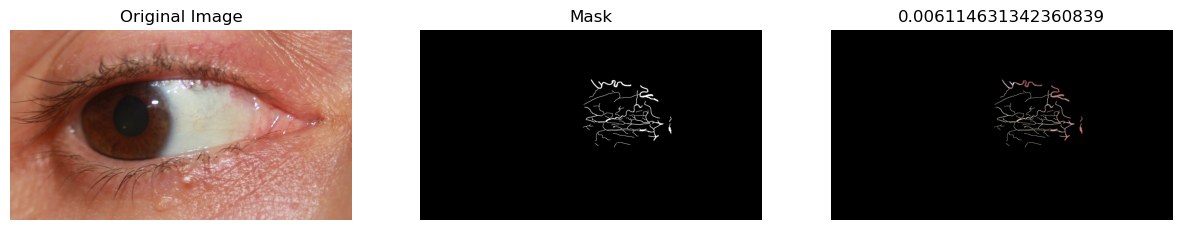

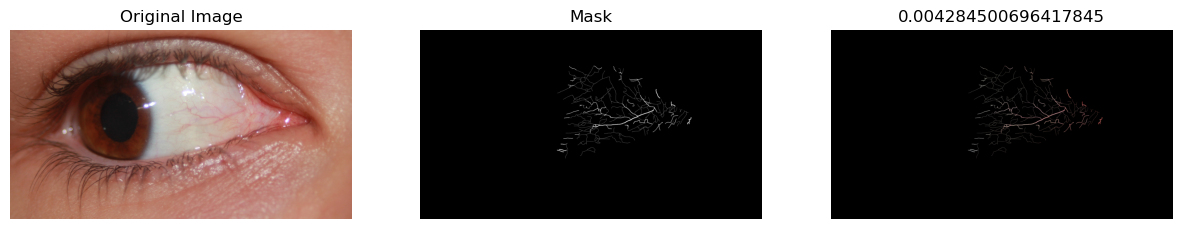

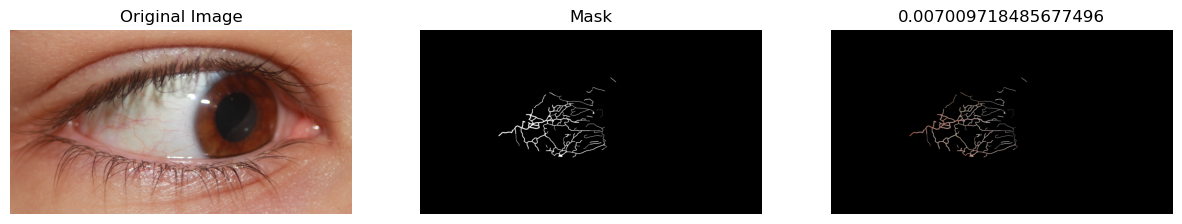

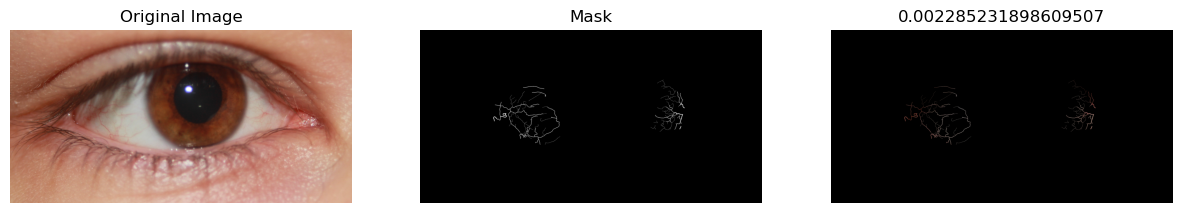

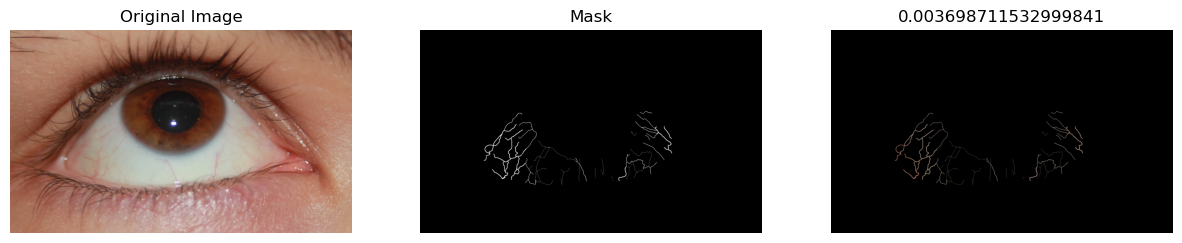

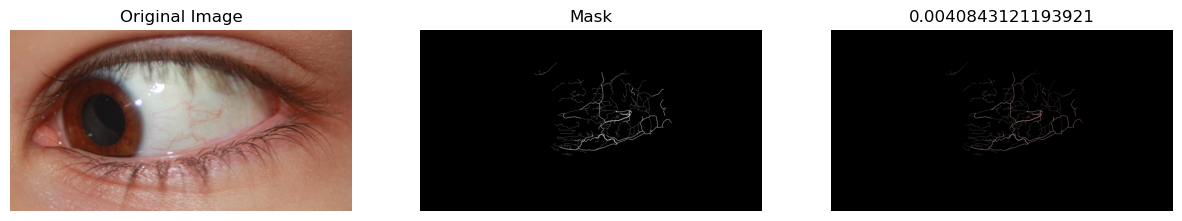

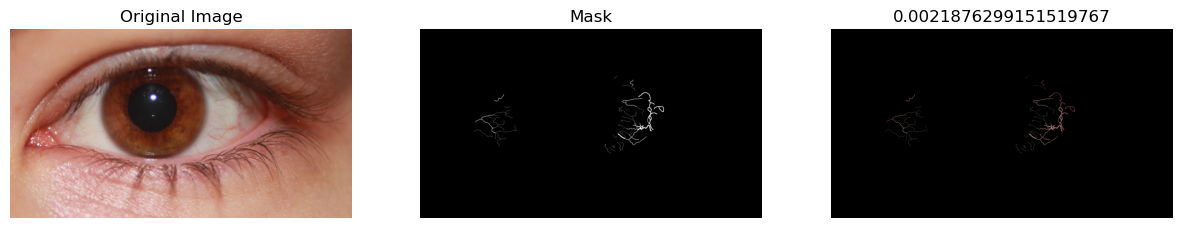

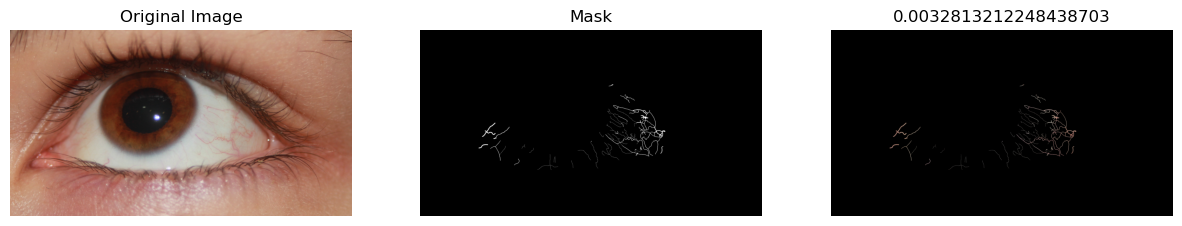

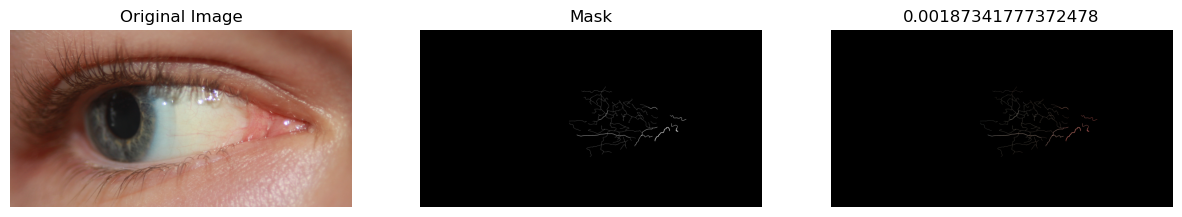

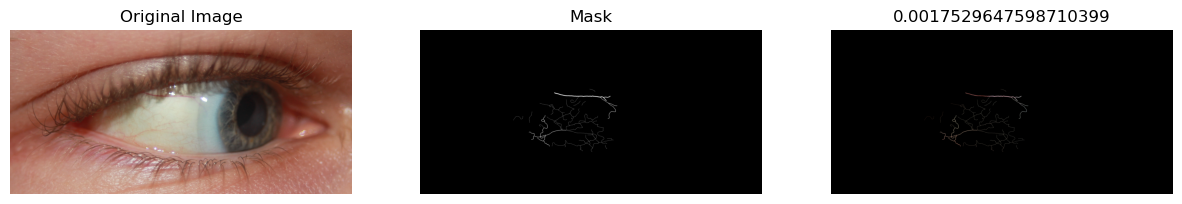

In [11]:
# Display Masked Images
def display_images(images, masks, masked_images, num_to_display=10):
    for i in range(min(num_to_display, len(images))):
        plt.figure(figsize=(15, 5))
        
        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis("off")
        
        # Mask
        plt.subplot(1, 3, 2)
        plt.imshow(masks[i], cmap="gray")
        plt.title("Mask")
        plt.axis("off")
        
        # Masked image
        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(masked_images[i], cv2.COLOR_BGR2RGB))
        plt.title(red_intensities[i])
        plt.axis("off")
        
        plt.show()

# Display the first few images
display_images(images, masks, masked_images)

Processing image: ../vessels/val/images/1.jpg and mask: ../vessels/val/masks/1.png
Images loaded successfully
Average red intensity: 0.0061 (high redness)


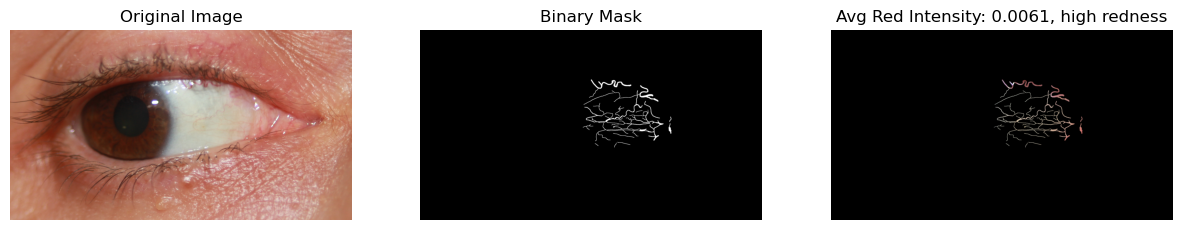

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_and_show_image(img_path, mask_path, threshold_red_intensity=0.0041114014789582895):
    # Load Images and Masks
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    mask = cv2.imread(mask_path, cv2.IMREAD_COLOR)

    if image is None:
        raise ValueError(f"Failed to load image: {img_path}")
    if mask is None:
        raise ValueError(f"Failed to load mask: {mask_path}")

    print(f"Processing image: {img_path} and mask: {mask_path}")
    print("Images loaded successfully")

    

    # Resize mask to match image dimensions
    resized_mask = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Convert mask to grayscale before thresholding
    gray_mask = cv2.cvtColor(resized_mask, cv2.COLOR_BGR2GRAY)

    # Ensure mask is binary (0 or 1)
    _, binary_mask = cv2.threshold(gray_mask, 127, 1, cv2.THRESH_BINARY)

    # Apply mask to the image
    masked_image = (image * binary_mask[:, :, np.newaxis]).astype(np.uint8)

    # Extract red channel and compute average red intensity
    red_channel = masked_image[:, :, 2]
    normalized_red_channel = red_channel / 255.0
    avg_red_intensity = np.mean(normalized_red_channel)
    if avg_red_intensity < threshold_red_intensity:
        redness_type = "low redness"
    else:
        redness_type = "high redness"
    print(f"Average red intensity: {avg_red_intensity:.4f} ({redness_type})")

    # Show results
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Mask
    plt.subplot(1, 3, 2)
    plt.imshow(binary_mask, cmap="gray")
    plt.title("Binary Mask")
    plt.axis("off")

    # Masked image with intensity title
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Avg Red Intensity: {avg_red_intensity:.4f}, {redness_type}")
    plt.axis("off")

    plt.show()

# Example paths
sample_img = "../vessels/val/images/1.jpg"
sample_mask = "../vessels/val/masks/1.png"

process_and_show_image(sample_img, sample_mask)
